In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from Helpers import plot_train_stat_per_epoch

In [2]:
# Source: https://www.kaggle.com/c/twitter-sentiment-analysis2/data
# train: https://www.kaggle.com/c/6740/download/train.csv
# test: https://www.kaggle.com/c/6740/download/test.csv

df = pd.read_csv('train.csv', encoding='latin-1')

In [3]:
X = df['SentimentText'].values
y = df['Sentiment'].values

In [4]:
from keras.preprocessing.text import Tokenizer

tk = Tokenizer()
tk.fit_on_texts(X)

c:\users\richard.ng\desktop\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
len(tk.word_index)

106612

In [6]:
max_words = 10000
tk.num_words = max_words
X_seq = tk.texts_to_sequences(X)

(array([5.4866e+04, 4.2494e+04, 2.6260e+03, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  1. ,  13.6,  26.2,  38.8,  51.4,  64. ,  76.6,  89.2, 101.8,
        114.4, 127. ]),
 <a list of 10 Patch objects>)

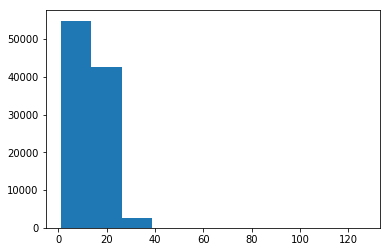

In [7]:
plt.hist([len(tweet.split()) for tweet in X])

In [8]:
from keras.preprocessing.sequence import pad_sequences

maxlen = 30
X_pad = pad_sequences(X_seq, maxlen=maxlen)

In [9]:
X_pad.shape

(99989, 30)

In [10]:
y.shape

(99989,)

In [11]:
def one_hot_encode_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [12]:
X_oht = one_hot_encode_sequences(X_pad, dimension=max_words)

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_oht, y, test_size=0.33, random_state=0)

In [15]:
X_train.shape

(66992, 10000)

In [16]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop
def model_1():
    model = Sequential()
    model.add(Dense(32, activation='relu', input_shape=(max_words,)))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['binary_accuracy'])
    model.summary()
    
    return model

In [18]:
model = model_1()
history = model.fit(X_train, y_train, validation_split=0.2, batch_size=32, epochs=10, verbose=2)
# peak at (9, 0.7684)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 320,065
Trainable params: 320,065
Non-trainable params: 0
_________________________________________________________________
Train on 53593 samples, validate on 13399 samples
Epoch 1/10
 - 14s - loss: 0.5255 - binary_accuracy: 0.7421 - val_loss: 0.5009 - val_binary_accuracy: 0.7628
Epoch 2/10
 - 13s - loss: 0.4754 - binary_accuracy: 0.7793 - val_loss: 0.4990 - val_binary_accuracy: 0.7680
Epoch 3/10
 - 13s - loss: 0.4622 - binary_accuracy: 0.7891 - val_loss: 0.4956 - val_binary_accuracy: 0.7711
Epoch 4/10
 - 13s - loss: 0.4544 - binary_accuracy: 0.7931 - val_loss: 0.4940 - val_binary_accuracy: 0.7707
Epoch 5/10
 - 13s - loss: 0.4493 - binary_accuracy

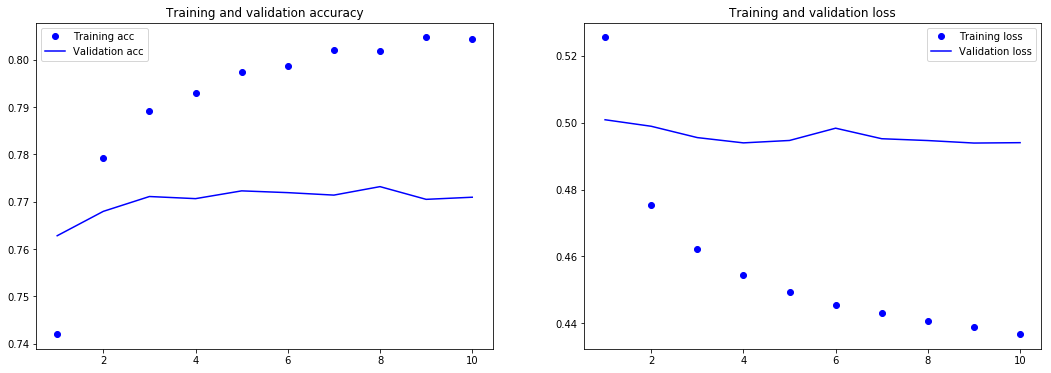

In [19]:
plot_train_stat_per_epoch(history.history)

In [22]:
optimal_ep = np.argmax(history.history['val_binary_accuracy']) + 1

In [24]:
del model
model = model_1()
model.fit(X_train, y_train, validation_split=0.2, batch_size=32, epochs=optimal_ep, verbose=2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 320,065
Trainable params: 320,065
Non-trainable params: 0
_________________________________________________________________
Train on 53593 samples, validate on 13399 samples
Epoch 1/8
 - 15s - loss: 0.5257 - binary_accuracy: 0.7414 - val_loss: 0.4986 - val_binary_accuracy: 0.7652
Epoch 2/8
 - 14s - loss: 0.4746 - binary_accuracy: 0.7801 - val_loss: 0.4999 - val_binary_accuracy: 0.7659
Epoch 3/8
 - 13s - loss: 0.4610 - binary_accuracy: 0.7891 - val_loss: 0.4963 - val_binary_accuracy: 0.7692
Epoch 4/8
 - 13s - loss: 0.4535 - binary_accuracy: 0.7948 - val_loss: 0.4948 - val_binary_accuracy: 0.7721
Epoch 5/8
 - 13s - loss: 0.4484 - binary_accuracy: 0.7

In [25]:
model.evaluate(X_test, y_test)

32997/32997 [==============================] - 5s 137us/step


[0.4938236237313779, 0.7700093947934661]

In [26]:
model.save('model_1.h5')

# Demo time

In [27]:
tweet = tk.texts_to_sequences(['Awesome!! Good work man', "That looks okay", 'This demo sucks -_-"'])

In [28]:
tweet_pad = pad_sequences(tweet, maxlen=maxlen)

In [29]:
tweeet_oht = one_hot_encode_sequences(tweet_pad, dimension=max_words)

In [30]:
model.predict(tweeet_oht)

array([[0.8427005 ],
       [0.5499886 ],
       [0.05215174]], dtype=float32)